In [1]:
import subprocess
import shlex
import os
import random
import pandas as pd

In [2]:
# CPU_NUMBER 0-3 efficiency core(icestorm), 4-7 performance core(firestorm)
CPU_NUMBER = 7 # performance

In [3]:
# CODE
up = f"""
	.arch armv8-a
	.file	"mispred_test.c"
	.text
	.global	a
	.bss
	.align	3
	.type	a, %object
	.size	a, 880
a:
	.zero	880
	.text
	.align	2
	.global	genRand
	.type	genRand, %function
genRand:
.LFB6:
	.cfi_startproc
	stp	x29, x30, [sp, -32]!
	.cfi_def_cfa_offset 32
	.cfi_offset 29, -32
	.cfi_offset 30, -24
	mov	x29, sp
	str	wzr, [sp, 28]
	b	.L2
.L3:
	bl	rand
	cmp	w0, 0
	and	w0, w0, 1
	csneg	w2, w0, w0, ge
	adrp	x0, a
	add	x0, x0, :lo12:a
	ldrsw	x1, [sp, 28]
	str	w2, [x0, x1, lsl 2]
	ldr	w0, [sp, 28]
	add	w0, w0, 1
	str	w0, [sp, 28]
.L2:
	ldr	w0, [sp, 28]
	cmp	w0, 219
	ble	.L3
	nop
	nop
	ldp	x29, x30, [sp], 32
	.cfi_restore 30
	.cfi_restore 29
	.cfi_def_cfa_offset 0
	ret
	.cfi_endproc
.LFE6:
	.size	genRand, .-genRand
	.section	.rodata
	.align	3
.LC0:
	.string	"sched_setaffinity([0])"
	.align	3
.LC1:
	.string	"python3 -c 'import math'"
	.align	3
.LC2:
	.string	"%5.3f\\n"
	.text
	.align	2
	.global	main
	.type	main, %function
main:
.LFB7:
	.cfi_startproc
	mov	x12, 32240
	sub	sp, sp, x12
	.cfi_def_cfa_offset 32240
	stp	x29, x30, [sp]
	.cfi_offset 29, -32240
	.cfi_offset 30, -32232
	mov	x29, sp
	stp	x19, x20, [sp, 16]
	.cfi_offset 19, -32224
	.cfi_offset 20, -32216
	adrp	x0, :got:__stack_chk_guard
	ldr	x0, [x0, :got_lo12:__stack_chk_guard]
	ldr	x1, [x0]
	str	x1, [sp, 32232]
	mov	x1, 0
	add	x0, sp, 232
	movi	v0.4s, 0
	stp	q0, q0, [x0]
	stp	q0, q0, [x0, 32]
	stp	q0, q0, [x0, 64]
	stp	q0, q0, [x0, 96]
	mov	x0, {CPU_NUMBER}
	str	x0, [sp, 96]
	ldr	x0, [sp, 96]
	cmp	x0, 1023
	bhi	.L6
	ldr	x0, [sp, 96]
	lsr	x0, x0, 6
	lsl	x1, x0, 3
	add	x2, sp, 232
	add	x1, x2, x1
	ldr	x2, [x1]
	ldr	x1, [sp, 96]
	and	w1, w1, 63
	mov	x3, 1
	lsl	x1, x3, x1
	lsl	x0, x0, 3
	add	x3, sp, 232
	add	x0, x3, x0
	orr	x1, x2, x1
	str	x1, [x0]
.L6:
	add	x0, sp, 232
	mov	x2, x0
	mov	x1, 128
	mov	w0, 0
	bl	sched_setaffinity
	str	w0, [sp, 56]
	ldr	w0, [sp, 56]
	cmn	w0, #1
	bne	.L7
	adrp	x0, .LC0
	add	x0, x0, :lo12:.LC0
	bl	perror
	mov	w0, -1
	bl	exit
.L7:
	adrp	x0, .LC1
	add	x0, x0, :lo12:.LC1
	bl	system
	str	w0, [sp, 60]
	add	x0, sp, 136
	mov	x2, 96
	mov	w1, 0
	bl	memset
	add	x0, sp, 136
	bl	perf_open
	adrp	x0, a
	add	x20, x0, :lo12:a
	str	wzr, [sp, 48]
	b	.L8
.L16:
	add	x0, sp, 232
	mov	x1, 32000
	mov	x2, x1
	mov	w1, 0
	bl	memset
	str	wzr, [sp, 52]
	b	.L9
.L13:
	bl	genRand
	adrp	x0, a
	add	x0, x0, :lo12:a
	ldr	w19, [x0]
	add	x0, sp, 136
	bl	perf_start
	cmp	w19, 0
	beq	.L10
	ldr	w0, [sp, 44]
	add	w0, w0, 114
	str	w0, [sp, 44]
.L10:

"""

down = """

	cmp	w19, 0
	beq	.L12
	ldr	w0, [sp, 44]
	add	w0, w0, 514
	str	w0, [sp, 44]
.L12:
	add	x1, sp, 232
	ldrsw	x0, [sp, 52]
	lsl	x0, x0, 5
	add	x1, x1, x0
	add	x0, sp, 136
	bl	perf_stop
	ldr	w0, [sp, 52]
	add	w0, w0, 1
	str	w0, [sp, 52]
.L9:
	ldr	w0, [sp, 52]
	cmp	w0, 999
	ble	.L13
	str	xzr, [sp, 64]
	str	xzr, [sp, 72]
	str	xzr, [sp, 80]
	str	xzr, [sp, 88]
	str	wzr, [sp, 52]
	b	.L14
.L15:
	ldrsw	x0, [sp, 52]
	lsl	x0, x0, 5
	add	x1, sp, 232
	ldr	d0, [x1, x0]
	ucvtf	d0, d0
	str	d0, [sp, 104]
	ldrsw	x0, [sp, 52]
	lsl	x0, x0, 5
	add	x1, sp, 240
	ldr	d0, [x1, x0]
	ucvtf	d0, d0
	str	d0, [sp, 112]
	ldrsw	x0, [sp, 52]
	lsl	x0, x0, 5
	add	x1, sp, 256
	ldr	d0, [x1, x0]
	ucvtf	d0, d0
	str	d0, [sp, 120]
	ldrsw	x0, [sp, 52]
	lsl	x0, x0, 5
	add	x1, sp, 248
	ldr	d0, [x1, x0]
	ucvtf	d0, d0
	str	d0, [sp, 128]
	ldr	d1, [sp, 64]
	ldr	d0, [sp, 104]
	fadd	d0, d1, d0
	str	d0, [sp, 64]
	ldr	d1, [sp, 72]
	ldr	d0, [sp, 112]
	fadd	d0, d1, d0
	str	d0, [sp, 72]
	ldr	d1, [sp, 80]
	ldr	d0, [sp, 120]
	fadd	d0, d1, d0
	str	d0, [sp, 80]
	ldr	d1, [sp, 88]
	ldr	d0, [sp, 128]
	fadd	d0, d1, d0
	str	d0, [sp, 88]
	ldr	w0, [sp, 52]
	add	w0, w0, 1
	str	w0, [sp, 52]
.L14:
	ldr	w0, [sp, 52]
	cmp	w0, 999
	ble	.L15
	mov	x0, 70368744177664
	movk	x0, 0x408f, lsl 48
	fmov	d1, x0
	ldr	d0, [sp, 88]
	fdiv	d0, d0, d1
	adrp	x0, .LC2
	add	x0, x0, :lo12:.LC2
	bl	printf
	ldr	w0, [sp, 48]
	add	w0, w0, 1
	str	w0, [sp, 48]
.L8:
	ldr	w0, [sp, 48]
	cmp	w0, 19
	ble	.L16
	mov	w0, 0
	mov	w1, w0
	adrp	x0, :got:__stack_chk_guard
	ldr	x0, [x0, :got_lo12:__stack_chk_guard]
	ldr	x3, [sp, 32232]
	ldr	x2, [x0]
	subs	x3, x3, x2
	mov	x2, 0
	beq	.L18
	bl	__stack_chk_fail
.L18:
	mov	w0, w1
	ldp	x19, x20, [sp, 16]
	ldp	x29, x30, [sp]
	mov	x12, 32240
	add	sp, sp, x12
	.cfi_restore 29
	.cfi_restore 30
	.cfi_restore 19
	.cfi_restore 20
	.cfi_def_cfa_offset 0
	ret
	.cfi_endproc
.LFE7:
	.size	main, .-main
	.ident	"GCC: (GNU) 12.1.0"
	.section	.note.GNU-stack,"",@progbits


"""

In [4]:
def unc_branch(n):
    bs = ""
    for i in range(n):
        if i < 100:
            bs += "b LBB3_" + str(i) + "\n"
            bs += "LBB3_" + str(i) + ":\n"
        elif i < 200:
            bs += "b LBB4_" + str(i-100) + "\n"
            bs += "LBB4_" + str(i-100) + ":\n"
        elif i < 300:
            bs += "b LBB5_" + str(i-200) + "\n"
            bs += "LBB5_" + str(i-200) + ":\n"
        elif i < 400:
            bs += "b LBB6_" + str(i-300) + "\n"
            bs += "LBB6_" + str(i-300) + ":\n"
        else:
            bs += "b LBB7_" + str(i-400) + "\n"
            bs += "LBB7_" + str(i-400) + ":\n"
    return bs

def always_taken_branch(n):
    bs = "mov w8, #0\n"
    for i in range(n):
        if i < 100:
            bs += "cbz w8, LBB3_" + str(i) + "\n"
            bs += "LBB3_" + str(i) + ":\n"
        elif i < 200:
            bs += "cbz w8, LBB4_" + str(i-100) + "\n"
            bs += "LBB4_" + str(i-100) + ":\n"
        elif i < 300:
            bs += "cbz w8, LBB5_" + str(i-200) + "\n"
            bs += "LBB5_" + str(i-200) + ":\n"
        elif i < 400:
            bs += "cbz w8, LBB6_" + str(i-300) + "\n"
            bs += "LBB6_" + str(i-300) + ":\n"
        else:
            bs += "cbz w8, LBB7_" + str(i-400) + "\n"
            bs += "LBB7_" + str(i-400) + ":\n"
    return bs

def always_not_taken_branch(n):
    bs = "mov w8, #1\n"
    for i in range(n):
        if i < 100:
            bs += "cbz w8, LBB3_" + str(i) + "\n"
            bs += "LBB3_" + str(i) + ":\n"
        elif i < 200:
            bs += "cbz w8, LBB4_" + str(i-100) + "\n"
            bs += "LBB4_" + str(i-100) + ":\n"
        elif i < 300:
            bs += "cbz w8, LBB5_" + str(i-200) + "\n"
            bs += "LBB5_" + str(i-200) + ":\n"
        elif i < 400:
            bs += "cbz w8, LBB6_" + str(i-300) + "\n"
            bs += "LBB6_" + str(i-300) + ":\n"
        else:
            bs += "cbz w8, LBB7_" + str(i-400) + "\n"
            bs += "LBB7_" + str(i-400) + ":\n"
    return bs

def mixed_branch(n):
	bs = ""
	bs = "mov w8, #1\n"
	bs += "mov w7, #0\n"
	for i in range(n):
		r = random.randint(0,2)
		if i < 100:
			if r == 0:
				bs += "cbz w8, LBB3_" + str(i) + "\n"
				bs += "LBB3_" + str(i) + ":\n"
			elif r == 1:
				bs += "b LBB3_" + str(i) + "\n"
				bs += "LBB3_" + str(i) + ":\n"
			else:
				bs += "cbz w7, LBB3_" + str(i) + "\n"
				bs += "LBB3_" + str(i) + ":\n"

		elif i < 200:
			if r == 0:
				bs += "cbz w8, LBB4_" + str(i) + "\n"
				bs += "LBB4_" + str(i) + ":\n"
			elif r == 1:
				bs += "b LBB4_" + str(i) + "\n"
				bs += "LBB4_" + str(i) + ":\n"
			else:
				bs += "cbz w7, LBB4_" + str(i) + "\n"
				bs += "LBB4_" + str(i) + ":\n"
	return bs

def rand_branch(n):
    rb = """
    add	x0, x20, {} // 4
	ldr	w0, [x0]
	cmp	w0, 0
	beq	.LBB3_{} // 11
.LBB3_{}:
    
    """
    rbs = ''
    for i in range(1,n+1):
        rbs += rb.format(i*4, i, i)
    
    return rbs

In [5]:
bb = []
for i in range(0,130):
	with open("mispred_test.s", "w") as file:
		file.write(up + unc_branch(i) + down)
	os.system(f"gcc -no-pie -g -flto -O3 perf.c mispred_test.s -o mispred_test -pthread -DCPU_NUMBER={CPU_NUMBER}")
	p = subprocess.run(shlex.split("./mispred_test"),stdout=subprocess.PIPE)
	x_min1 = float("inf")
	for l in p.stdout.split(b'\n'):
		if not l:continue
		x = float(l.decode())
		x_min1 = min(x_min1, x)
	
	with open("mispred_test.s", "w") as file:
		file.write(up + always_taken_branch(i) + down)
	os.system(f"gcc -no-pie -g -flto -O3 perf.c mispred_test.s -o mispred_test -pthread -DCPU_NUMBER={CPU_NUMBER}")
	p = subprocess.run(shlex.split("./mispred_test"),stdout=subprocess.PIPE)
	x_min2 = float("inf")
	for l in p.stdout.split(b'\n'):
		if not l:continue
		x = float(l.decode())
		x_min2 = min(x_min2, x)
	
	with open("mispred_test.s", "w") as file:
		file.write(up + always_not_taken_branch(i) + down)
	os.system(f"gcc -no-pie -g -flto -O3 perf.c mispred_test.s -o mispred_test -pthread -DCPU_NUMBER={CPU_NUMBER}")
	p = subprocess.run(shlex.split("./mispred_test"),stdout=subprocess.PIPE)
	x_min3 = float("inf")
	for l in p.stdout.split(b'\n'):
		if not l:continue
		x = float(l.decode())
		x_min3 = min(x_min3, x)
  
	with open("mispred_test.s", "w") as file:
		file.write(up + rand_branch(i) + down)
	os.system(f"gcc -no-pie -g -flto -O3 perf.c mispred_test.s -o mispred_test -pthread -DCPU_NUMBER={CPU_NUMBER}")
	p = subprocess.run(shlex.split("./mispred_test"),stdout=subprocess.PIPE)
	x_min4 = float("inf")
	for l in p.stdout.split(b'\n'):
		if not l:continue
		x = float(l.decode())
		x_min4 = min(x_min4, x)

	bb.append([i, x_min1, x_min2, x_min3, x_min4 - 0.5 * i])
	# bb.append([i, x_min4])

	if i % 20 == 0: print(i, bb[-1])

0 [0, 0.485, 0.484, 0.479, 0.465]
20 [20, 0.465, 0.479, 0.465, 0.8130000000000006]
40 [40, 0.486, 0.466, 0.477, 0.8060000000000009]
60 [60, 0.465, 0.481, 0.465, 0.6729999999999983]
80 [80, 0.466, 0.487, 0.477, 0.6229999999999976]
100 [100, 0.961, 0.926, 0.472, 0.6099999999999994]
120 [120, 0.957, 0.958, 0.467, 0.7209999999999965]


In [6]:
df = pd.DataFrame(bb, columns=['idx', 'unc branch', 'always taken branch', 'always not taken branch', 'rand branch'])

In [7]:
df.to_csv('script_performance.csv')
# df = pd.read_csv('script_performance.csv')

<Axes: title={'center': 'apple m1 performance core cbp phr length'}, xlabel='number of dummy branches', ylabel='misprediction rate'>

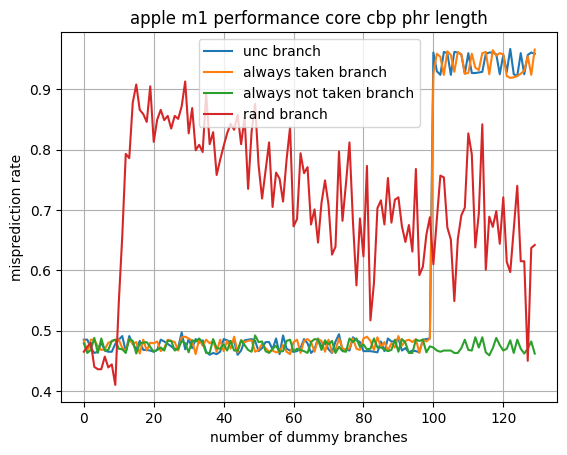

In [8]:
df.plot(x=0, xlabel='number of dummy branches', ylabel='misprediction rate', title='apple m1 performance core cbp phr length', grid=True)